# Submission of Task 4 for the screening of QOSF Mentorship Program 
## Programming Language:Qiskit
## Steps:
###           1. Creating an array consisting of all the pauli matrices i.e I,Z,X,Y

###           2. Finding the kronecker product of the above mentioned matrices for generating the hamiltionian

###           3. Storing the eigenvalues of the matrices to a dictionary

###           4. Initializing and parameterizing anzatz

###           5. Running a simulator within the specified range of angles

###           6. Finding the minimum expectation value

In [70]:
# installing necessary libraries
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from matplotlib import pyplot as pl

In [71]:
# storing all Pauli matrices (i, z, x, y)
pauli = np.array([[[1,0],[0,1]], [[1,0],[0,-1]], [[0,1],[1,0]], [[0,-1j],[1j,0]]])
pauli

array([[[ 1.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j]],

       [[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]],

       [[ 0.+0.j,  1.+0.j],
        [ 1.+0.j,  0.+0.j]],

       [[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]])

In [72]:
# finding kronecker product of Pauli matrices with themselves for generating the hamiltonian
ii = np.kron(pauli[0], pauli[0])
zz = np.kron(pauli[1], pauli[1])
xx = np.kron(pauli[2], pauli[2])
yy = np.kron(pauli[3], pauli[3])

In [73]:
# displaying eigenvalues and eigenvectors of all matrices
print('ii:\neigenvalues: ', np.linalg.eig(ii)[0], '\neigenvectors\n',np.linalg.eig(ii)[1])
print()
print('zz:\neigenvalues: ', np.linalg.eig(zz)[0], '\neigenvectors\n',np.linalg.eig(zz)[1])
print()
print('xx:\neigenvalues: ', np.linalg.eig(xx)[0], '\neigenvectors\n',np.linalg.eig(xx)[1])
print()
print('yy:\neigenvalues: ', np.linalg.eig(yy)[0], '\neigenvectors\n',np.linalg.eig(yy)[1])

ii:
eigenvalues:  [1.+0.j 1.+0.j 1.+0.j 1.+0.j] 
eigenvectors
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

zz:
eigenvalues:  [ 1.+0.j -1.+0.j -1.+0.j  1.-0.j] 
eigenvectors
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

xx:
eigenvalues:  [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j] 
eigenvectors
 [[ 0.70710678-0.j  0.70710678+0.j -0.        -0.j -0.        -0.j]
 [-0.        -0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [-0.        -0.j  0.        +0.j  0.70710678-0.j -0.70710678-0.j]
 [ 0.70710678+0.j -0.70710678+0.j -0.        -0.j -0.        -0.j]]

yy:
eigenvalues:  [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j] 
eigenvectors
 [[-0.70710678+0.j  0.70710678+0.j -0.        -0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678-0.j -0.70710678+0.j]
 [ 0.70710678

In [74]:
# storing the eigenvalues to a dictionary for mapping
# convenience
eig_values = [{'00':1, '01':1, '10':1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1}]

In [75]:
# generating the Hamiltonian
print('Hamiltonian whose eigenvalue is to be found:')
print(-1/2*(xx + yy) + 1/2*(ii + zz))

Hamiltonian whose eigenvalue is to be found:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


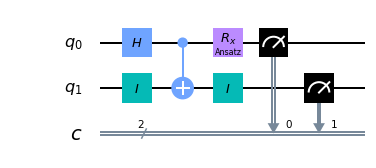

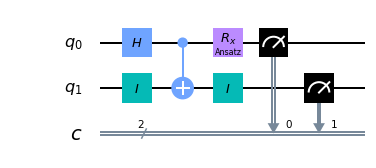

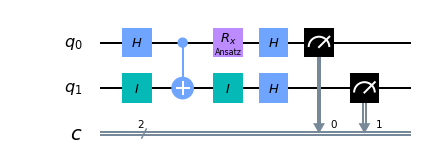

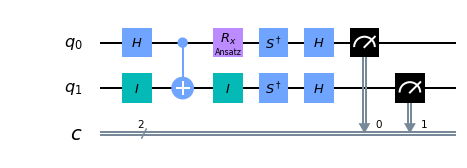

In [76]:
# Initializing a circuit
qc = [QuantumCircuit(2, 2) for _ in range(4)]
 
# creation of a parameter
param = Parameter('Ansatz')
 
# defining anzatz
for i in range(4):  
    qc[i].h(0)
    qc[i].i(1)
    qc[i].cx(0,1)
    qc[i].rx(param, 0)
    qc[i].i(1)
 
# Adding provisions for measurement in x and y basis respectively
qc[2].h([0,1])
qc[3].sdg([0,1])
qc[3].h([0,1])
 
# adding measurements and finally, displaying all circuits
for i in range(4):
    qc[i].measure([0,1],[0,1])
    display(qc[i].draw('mpl'))

In [77]:
# Parameters 
#    :num_theta : The number of angle divisions for a particular range specified
#    :num_shots  : number of shots of each quantum circuit
#    :lower_theta: The lower limit of the range of angles to be searched
#    :upper_theta: The upper limit of the range of angles to be searched
 
num_theta = 100
num_shots = 100
lower_theta = 0
upper_theta = 2*np.pi
 
# creating a list of num_angles between lower_theta and upper_theta
angles = np.linspace(lower_theta, upper_theta, num_theta)
 
# we use qasm simulator to find the number of counts of each measurement outcome
sim = Aer.get_backend('qasm_simulator')
 
# executing all 4 circuits for every angle in list angles and store in list output
output = []
for i in angles:
    out = []
    for circuit in qc:
        circuit = circuit.assign_parameters({param: i})
        result = execute(circuit, sim, shots = num_shots).result()
        out.append(result.get_counts(circuit))
    output.append(out)

In [78]:
# finding the minimum expectation value of the Hamiltonian using the
# measurement outcomes using the list output from previous cell.
 
# first, for every angle, average of measurement output, mapped to the
# eigenvalue of the respective component is found. 
#  The average values are substituted in the equation of the Hamiltonian. This gives the 
# expectation value of the whole Hamiltonian for that value of Ansatz. 
 
# The value of the expectations of the Hamiltonian are stored in list final.
 
# The minimum value of the expectation of the Hamiltonian is stored in 
# min_eigen and it's index in the list output is stored in min_eigen_index.
 
final = []
min_eigen = 100
 
for i in range(num_theta):
    out2 = []
    for j in range(4):
        avg = 0
        for key, value in output[i][j].items():
            avg += eig_values[j][key]*value
        out2.append(avg/num_shots)
 
    final.append(-1/2*(out2[2] + out2[3]) + 1/2*(out2[0] + out2[1]))
    if final[-1] < min_eigen:
        min_eigen = final[-1]
        index = i

print('minimum Eigen value: ', min_eigen)

minimum Eigen value:  -1.0


# Plotting the data and observing the miniumum eigenvalue graphically

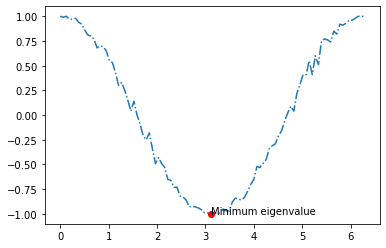

In [79]:
pl.plot(angles,final,linestyle = '-.' )
pl.plot(angles[index], min_eigen, 'ro')
pl.annotate("Minimum eigenvalue",(angles[index],min_eigen))
pl.show()

Here, we can see that the values descend initially and attain a minimum and then ascend.


That minimum value gives us a perfect answer to our question